In this notebook, I want to compute the uncertainty of the phonon dispersion curves from the bootstrap ensembles.

In [1]:
from pathlib import Path
import json
from datetime import datetime
from tqdm import tqdm
import sys

from ase import Atoms
from ase.calculators.kim import KIM
from ase.phonons import Phonons
from ase.visualize import view

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("default")

WORK_DIR = Path().absolute()
sys.path.append(str(WORK_DIR.parent))

In [2]:
from energyvslatconst.energyvslatconst import energyvslatconst
from energyvslatconst.relaxation_latconst import equilibrate_graphene

In [3]:
# Read setting file
ROOT_DIR = WORK_DIR.parent
with open(ROOT_DIR / "settings.json", "r") as f:
    settings = json.load(f)
partition = settings["partition"]
RES_DIR = WORK_DIR / "results" / "dropout" / f"{partition}_partition"

In [4]:
# Equilibrium lattice constant
potential = "DUNN_best_train"
ainit = 2.466
a0, e0 = equilibrate_graphene(potential, ainit)
print("Equilibrium lattice constant:", a0)

Equilibrium lattice constant: 2.457349734375


In [5]:
# Graphene sheet
cell = a0 * np.array([[1, 0, 0], [0.5, np.sqrt(3) / 2, 0], [0, 0, 10]])
positions = np.array([cell[0], 1 / 3 * cell[0] + 1 / 3 * cell[1]])
atoms = Atoms("2C", positions=positions, cell=cell, pbc=[1, 1, 1])
# view(atoms.repeat((4, 4, 1)))

In [6]:
energies = np.empty((0, 100, 6))
for ii in tqdm(range(100)):
    sample_dir = RES_DIR / f"{ii:03d}"

    # Phonon calculator
    calc = KIM(potential)
    calc.set_parameters(active_member_id=[[0], [ii + 1]])
    ph = Phonons(
        atoms, calc, supercell=(8, 8, 1), delta=0.01, name=sample_dir / "phonon"
    )
    ph.run()

    # Read forces and assemble the dynamical matrix
    ph.read(acoustic=True)
    # ph.clean()

    path = atoms.cell.bandpath("GMKG", npoints=100)
    bs = ph.get_band_structure(path)
    energies = np.concatenate((energies, bs.energies), axis=0)

  0%|                                                                         | 0/100 [00:00<?, ?it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.786e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.824e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.092e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.439e-02*i)


  1%|▋                                                                | 1/100 [00:00<00:16,  6.02it/s]

WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.473e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 6.304e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 9.330e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.495e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.415e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.062e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.638e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.786e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.258e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.198e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.105e-03*i)
WARNING, 1 imaginary frequencies

  5%|███▎                                                             | 5/100 [00:00<00:12,  7.71it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 7.163e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 7.163e-05*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.442e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.486e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.125e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.725e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 5.938e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 7.161e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.710e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.929e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.345e-03*i)
WARNING, 2 imaginary frequencies

  7%|████▌                                                            | 7/100 [00:00<00:11,  8.39it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.840e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.840e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.365e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.365e-05*i)


  9%|█████▊                                                           | 9/100 [00:00<00:10,  9.01it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.453e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.453e-04*i)


 10%|██████▍                                                         | 10/100 [00:01<00:09,  9.19it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.286e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.106e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.183e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.250e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.020e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.286e-04*i)


 11%|███████                                                         | 11/100 [00:01<00:09,  9.22it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.963e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.202e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.193e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.787e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.123e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.063e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.074e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.963e-04*i)


 12%|███████▋                                                        | 12/100 [00:01<00:09,  9.43it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.498e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.498e-04*i)


 14%|████████▉                                                       | 14/100 [00:01<00:08,  9.70it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.077e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.077e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.056e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.909e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.786e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 6.890e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.106e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.653e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.789e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.056e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.289e-04*i)
WARNING, 1 imaginary frequencies

 16%|██████████▏                                                     | 16/100 [00:01<00:08,  9.40it/s]

WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.466e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.640e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.447e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.057e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.544e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.289e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.169e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.778e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.539e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.771e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 9.065e-04*i)
WARNING, 1 imaginary frequencies

 18%|███████████▌                                                    | 18/100 [00:01<00:08,  9.22it/s]

WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 2.046e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.518e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 2.777e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 2.704e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.10,  0.00,  0.00) ; (omega_q = 1.993e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 2.248e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 2.753e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.752e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 2.465e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.991e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.391e-02*i)
WARNING, 1 imaginary frequencies

 20%|████████████▊                                                   | 20/100 [00:02<00:08,  9.35it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.579e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.579e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.810e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.860e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.822e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.810e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.442e-04*i)


 22%|██████████████                                                  | 22/100 [00:02<00:08,  9.44it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.442e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.156e-06*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.017e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.140e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.539e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.686e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.316e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.439e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.687e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.508e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.107e-02*i)
WARNING, 1 imaginary frequencies

 24%|███████████████▎                                                | 24/100 [00:02<00:09,  8.22it/s]

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.119e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.743e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.964e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.654e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.039e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.039e-04*i)


 26%|████████████████▋                                               | 26/100 [00:02<00:08,  8.88it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.031e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.031e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.481e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.481e-04*i)


 28%|█████████████████▉                                              | 28/100 [00:02<00:07,  9.14it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.978e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.978e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.999e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.907e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.920e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.080e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 7.345e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 8.462e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.076e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.702e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.752e-03*i)
WARNING, 2 imaginary frequencies

 31%|███████████████████▊                                            | 31/100 [00:03<00:07,  9.58it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.504e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.504e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.647e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 7.088e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 7.438e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.647e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.886e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.886e-04*i)


 32%|████████████████████▍                                           | 32/100 [00:03<00:07,  9.38it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 8.438e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.071e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.724e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 4.811e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 5.496e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.630e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.950e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 8.438e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.801e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.396e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.807e-03*i)
WARNING, 1 imaginary frequencies

 35%|██████████████████████▍                                         | 35/100 [00:03<00:06,  9.47it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.484e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.380e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.293e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.845e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.272e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.219e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.343e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.257e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.254e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.582e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.124e-03*i)
WARNING, 1 imaginary frequencies

 37%|███████████████████████▋                                        | 37/100 [00:03<00:06,  9.37it/s]

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.527e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.362e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.234e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.062e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.471e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.728e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.394e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 9.376e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 2.741e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.480e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.209e-03*i)
WARNING, 1 imaginary frequencies

 39%|████████████████████████▉                                       | 39/100 [00:04<00:06,  9.21it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.097e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.025e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.860e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.320e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.843e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 2.179e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 2.205e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.08,  0.00,  0.00) ; (omega_q = 1.606e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 1.810e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.230e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 2.148e-02*i)
WARNING, 1 imaginary frequencies

 41%|██████████████████████████▏                                     | 41/100 [00:04<00:06,  9.11it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.760e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.075e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.433e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.216e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.158e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.197e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.200e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.182e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.913e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.760e-05*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.456e-04*i)
WARNING, 1 imaginary frequencies

 42%|██████████████████████████▉                                     | 42/100 [00:04<00:06,  9.31it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.728e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.728e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.673e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.673e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.376e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.583e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.386e-03*i)


 45%|████████████████████████████▊                                   | 45/100 [00:04<00:05,  9.65it/s]

WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.457e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.513e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.376e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.002e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.773e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 6.402e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 5.730e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.097e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.293e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 3.658e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.002e-04*i)
WARNING, 2 imaginary frequencies

 47%|██████████████████████████████                                  | 47/100 [00:04<00:05,  9.97it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.415e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 6.415e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.243e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.777e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.290e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.759e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.975e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.712e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.807e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.966e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.721e-02*i)
WARNING, 1 imaginary frequencies

 51%|████████████████████████████████▋                               | 51/100 [00:05<00:04,  9.92it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.444e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.444e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.593e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.593e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.749e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.611e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.583e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.749e-04*i)


 52%|█████████████████████████████████▎                              | 52/100 [00:05<00:04,  9.91it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.701e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.701e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 7.482e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 7.482e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.982e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.458e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.233e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.693e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.932e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.769e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 8.687e-03*i)
WARNING, 1 imaginary frequencies

 54%|██████████████████████████████████▌                             | 54/100 [00:05<00:04, 10.04it/s]

WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.917e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.655e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.197e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 6.250e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.982e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.863e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 6.295e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.199e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.640e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.855e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.07,  0.00,  0.00) ; (omega_q = 1.647e-02*i)
WARNING, 1 imaginary frequencies

 58%|█████████████████████████████████████                           | 58/100 [00:06<00:04, 10.03it/s]

WARNING, 1 imaginary frequencies at q = ( 0.05, -0.05,  0.00) ; (omega_q = 1.362e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 1.888e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.869e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.581e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.133e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.887e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.008e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.535e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.535e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.727e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.128e-03*i)
WARNING, 1 imaginary frequencies

 60%|██████████████████████████████████████▍                         | 60/100 [00:06<00:04,  8.94it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.215e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 1.823e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.918e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 1.783e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.215e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.855e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.855e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.393e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.393e-04*i)


 63%|████████████████████████████████████████▎                       | 63/100 [00:06<00:03,  9.47it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.842e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.842e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.757e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.871e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.087e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.389e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.275e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.329e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.372e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.059e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.684e-03*i)
WARNING, 1 imaginary frequencies

 65%|█████████████████████████████████████████▌                      | 65/100 [00:06<00:03,  9.70it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.053e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.258e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.676e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 3.588e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 3.649e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.603e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.258e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.374e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.169e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.531e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.878e-03*i)
WARNING, 1 imaginary frequencies

 67%|██████████████████████████████████████████▉                     | 67/100 [00:06<00:03,  9.82it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.636e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 3.023e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 4.306e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 4.335e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.938e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.636e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.031e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.031e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.488e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.141e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.573e-03*i)
WARNING, 1 imaginary frequencies

 71%|█████████████████████████████████████████████▍                  | 71/100 [00:07<00:02, 10.09it/s]

WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 3.850e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.236e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.223e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.316e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.977e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.488e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.162e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.162e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.332e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.332e-04*i)


 73%|██████████████████████████████████████████████▋                 | 73/100 [00:07<00:02, 10.29it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.671e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.671e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.128e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.128e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.219e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.219e-04*i)


 77%|█████████████████████████████████████████████████▎              | 77/100 [00:07<00:02, 10.53it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.175e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.175e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 9.562e-05*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 9.562e-05*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.125e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.125e-04*i)


 79%|██████████████████████████████████████████████████▌             | 79/100 [00:08<00:02, 10.48it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.287e-06*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 5.287e-06*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.018e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 2.375e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 2.564e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 2.728e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 2.313e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.018e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.667e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.667e-04*i)


 81%|███████████████████████████████████████████████████▊            | 81/100 [00:08<00:01, 10.41it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.592e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.468e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 8.158e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.001e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 7.473e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 8.309e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.950e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.954e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.328e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.592e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.140e-04*i)
WARNING, 1 imaginary frequencies

 85%|██████████████████████████████████████████████████████▍         | 85/100 [00:08<00:01, 10.50it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.171e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.171e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.946e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.946e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.380e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.380e-04*i)


 87%|███████████████████████████████████████████████████████▋        | 87/100 [00:08<00:01, 10.52it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.040e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.040e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.708e-05*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.708e-05*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.087e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.087e-04*i)


 89%|████████████████████████████████████████████████████████▉       | 89/100 [00:09<00:01, 10.44it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.475e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 4.129e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 7.132e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 7.064e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 7.327e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 6.996e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.002e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.475e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.586e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.586e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.422e-04*i)
WARNING, 2 imaginary frequencies

 93%|███████████████████████████████████████████████████████████▌    | 93/100 [00:09<00:00, 10.57it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.335e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.335e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.427e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.427e-04*i)


 95%|████████████████████████████████████████████████████████████▊   | 95/100 [00:09<00:00,  9.20it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.347e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.046e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 9.327e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.185e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.064e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.117e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.172e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 9.083e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.886e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.347e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.957e-04*i)
WARNING, 2 imaginary frequencies

 96%|█████████████████████████████████████████████████████████████▍  | 96/100 [00:09<00:00,  9.29it/s]

WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 9.699e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.266e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.159e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 8.597e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 4.540e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.916e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.861e-04*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.861e-04*i)


 99%|███████████████████████████████████████████████████████████████▎| 99/100 [00:10<00:00,  9.04it/s]

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.340e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.01,  0.00,  0.00) ; (omega_q = 5.802e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03,  0.00,  0.00) ; (omega_q = 1.079e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04,  0.00,  0.00) ; (omega_q = 1.394e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.06,  0.00,  0.00) ; (omega_q = 1.336e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.04, -0.04,  0.00) ; (omega_q = 2.581e-03*i)
WARNING, 1 imaginary frequencies at q = ( 0.03, -0.03,  0.00) ; (omega_q = 1.378e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.375e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.02, -0.02,  0.00) ; (omega_q = 1.050e-02*i)
WARNING, 1 imaginary frequencies at q = ( 0.01, -0.01,  0.00) ; (omega_q = 5.618e-03*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 4.340e-04*i)
WARNING, 2 imaginary frequencies

100%|███████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.71it/s]

WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.437e-04*i)
WARNING, 1 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 3.437e-04*i)


In [7]:
# Convert to THz
conversion = 4.136e-3 # 1 Thz = 4.136 meV
energies /= conversion

labels = bs.get_labels()
mean_energies = np.mean(energies, axis=0)
error_energies = np.std(energies, axis=0)

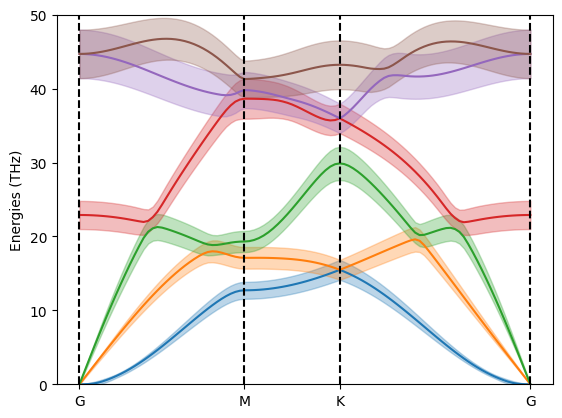

In [8]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
plt.figure()

for ii, eng in enumerate(mean_energies.T):
    plt.fill_between(
        labels[0],
        eng - error_energies[:, ii],
        eng + error_energies[:, ii],
        color=colors[ii],
        alpha=0.3,
    )
    plt.plot(labels[0], eng, c=colors[ii])

for xcoord, name in zip(labels[1], labels[2]):
    plt.axvline(xcoord, c="k", ls="--")
plt.xticks(labels[1], labels[2])
plt.ylim(0, 50)
plt.ylabel("Energies (THz)")
plt.show()